# Anlisis Exploratorio de los Datos de la penetracion de internet en argentina

In [38]:
# importamos las librerias que seran utiles en nuestro EDA.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Cargamos los datos de la penetracion de internet en Argentina por provincia.
internet_penetracion = pd.read_csv("./datasets/Internet_Penetracion.csv")
internet_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"
3,2022,1,Chaco,"44,06"
4,2022,1,Chubut,"88,05"


In [40]:
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           792 non-null    int64 
 1   Trimestre                     792 non-null    int64 
 2   Provincia                     792 non-null    object
 3   Accesos por cada 100 hogares  792 non-null    object
dtypes: int64(2), object(2)
memory usage: 24.9+ KB


In [41]:
# verificamos que no se repitan las provincias
internet_penetracion.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [42]:
# la columna "Accesos por cada 100 hogares" es de typo object pero para los calculos necesitamos que sea de typo numerico.
internet_penetracion["Accesos por cada 100 hogares"] = internet_penetracion["Accesos por cada 100 hogares"].str.replace(',','.')
internet_penetracion["Accesos por cada 100 hogares"] = pd.to_numeric(internet_penetracion["Accesos por cada 100 hogares"])
internet_penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,792.000000,792.000000,792.000000
mean,2017.636364,2.454545,47.907184
std,2.386030,1.131306,22.810661
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,31.540000
50%,2018.000000,2.000000,44.625000
75%,2020.000000,3.000000,60.575000
max,2022.000000,4.000000,124.060000


In [43]:
# para ver los años y trimestres juntamos las columnas
internet_penetracion["Año-Tri"] = internet_penetracion['Año'].astype(str).str.cat(internet_penetracion['Trimestre'].astype(str), sep='-')
internet_penetracion.head(30)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Año-Tri
0,2022,1,Buenos Aires,76.08,2022-1
1,2022,1,Capital Federal,111.80,2022-1
2,2022,1,Catamarca,58.21,2022-1
3,2022,1,Chaco,44.06,2022-1
4,2022,1,Chubut,88.05,2022-1
5,2022,1,Córdoba,85.76,2022-1
6,2022,1,Corrientes,47.64,2022-1
7,2022,1,Entre Ríos,63.70,2022-1
8,2022,1,Formosa,34.96,2022-1
9,2022,1,Jujuy,58.06,2022-1


<AxesSubplot: xlabel='Año-Tri', ylabel='Accesos por cada 100 hogares'>

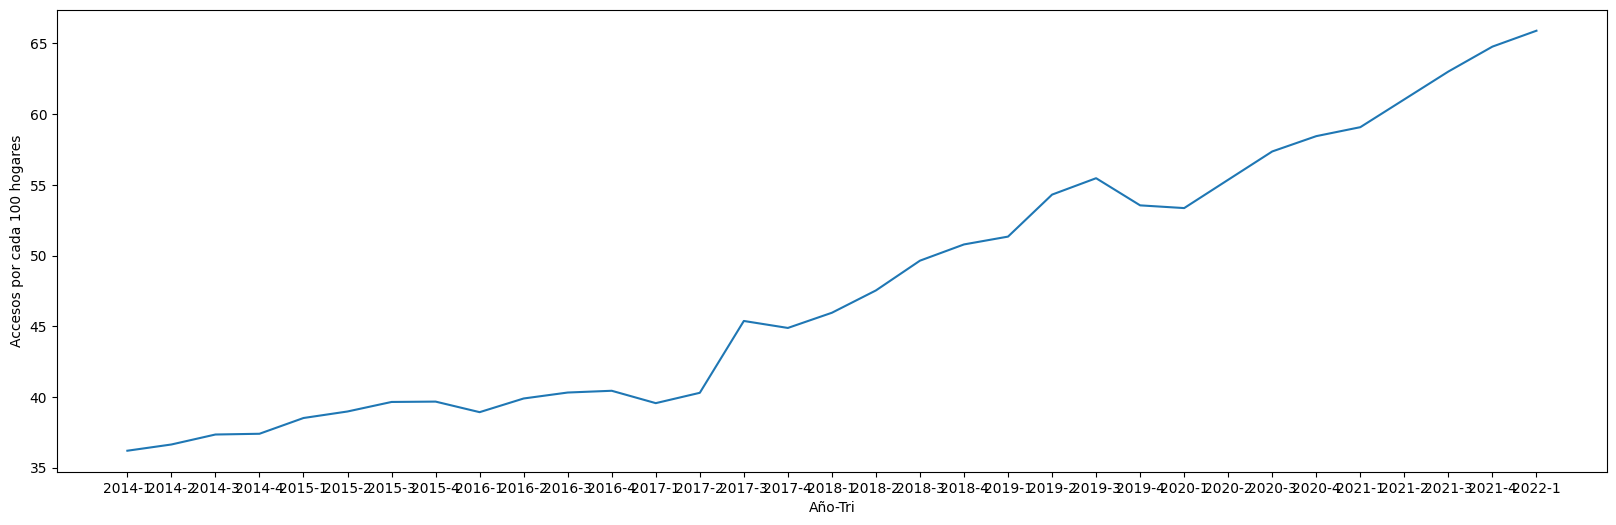

In [44]:
# graficamos los como fue la penetracion de internet en lo hogares por años y trimestres.
internet_penetracion_acceso_hogares = internet_penetracion[["Año-Tri", "Accesos por cada 100 hogares"]].groupby("Año-Tri").mean()
plt.figure(figsize=(20, 6))
sns.lineplot(data=internet_penetracion_acceso_hogares, x="Año-Tri", y="Accesos por cada 100 hogares")

In [45]:
# separamos los datos, el inicio de los datos '2014' y la actualidad '2022'
ip_2014 = internet_penetracion[internet_penetracion['Año'] == 2014]
ip_2022 = internet_penetracion[internet_penetracion['Año'] == 2022]

C:\Users\devek\AppData\Local\Temp\ipykernel_1624\3483124724.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ip_2014 = ip_2014.groupby("Provincia").mean()


<AxesSubplot: xlabel='Accesos por cada 100 hogares', ylabel='Provincia'>

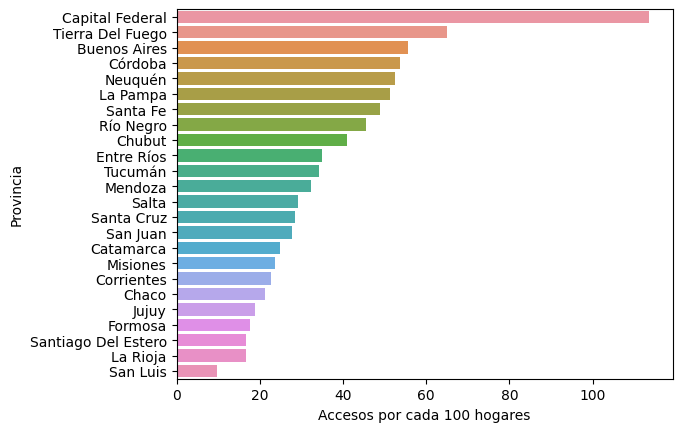

In [46]:
# graficamos la penetracion de internet por provincia en el año 2014
ip_2014 = ip_2014.groupby("Provincia").mean()
ip_2014.sort_values(by=["Accesos por cada 100 hogares"], ascending=False, inplace=True)
sns.barplot(data=ip_2014, x="Accesos por cada 100 hogares", y=ip_2014.index)

C:\Users\devek\AppData\Local\Temp\ipykernel_1624\2791697766.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ip_2022 = ip_2022.groupby("Provincia").mean()


<AxesSubplot: xlabel='Accesos por cada 100 hogares', ylabel='Provincia'>

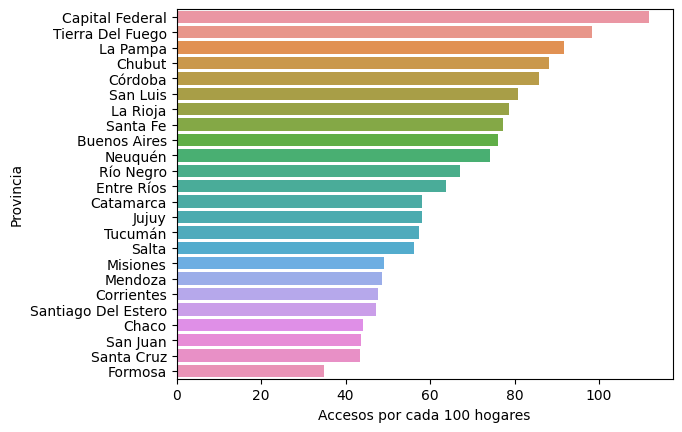

In [47]:
# graficamos la penetracion de internet por provincia en el año 2022
ip_2022 = ip_2022.groupby("Provincia").mean()
ip_2022.sort_values(by=["Accesos por cada 100 hogares"], ascending=False, inplace=True)
sns.barplot(data=ip_2022, x="Accesos por cada 100 hogares", y=ip_2022.index)

# KPI - el promedio de la variación porcentual trimestral

<AxesSubplot: xlabel='Año,Trimestre'>

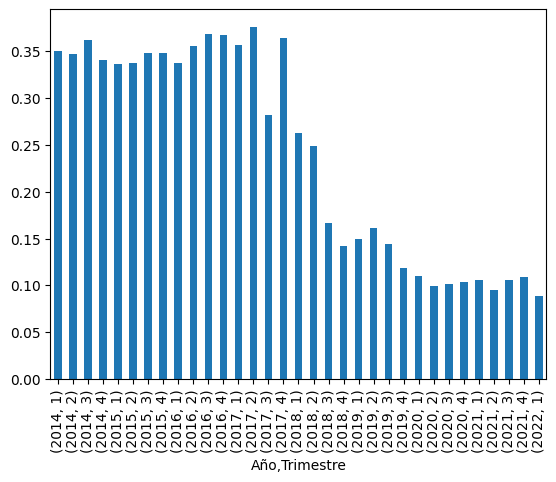

In [50]:
# Crear una nueva columna que calcule la variación porcentual trimestral y lo graficamos
internet_penetracion["variacion_trimestral"] = (internet_penetracion["Accesos por cada 100 hogares"] - internet_penetracion["Accesos por cada 100 hogares"].shift(2)) / internet_penetracion["Accesos por cada 100 hogares"].shift(2)
df_agrupado = internet_penetracion.groupby(["Año", "Trimestre"])["variacion_trimestral"].mean()
df_agrupado.plot(kind="bar")

In [ ]:
ib = pd.read_csv("./datasets/Internet_BAF.csv")
ib.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
1,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
2,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
3,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
4,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021


In [ ]:
ib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               33 non-null     int64  
 1   Trimestre         33 non-null     int64  
 2   Banda ancha fija  33 non-null     object 
 3   Dial up           33 non-null     float64
 4   Total             33 non-null     object 
 5   Periodo           33 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ KB


In [ ]:
chart = ib.groupby("Año").sum()

C:\Users\devek\AppData\Local\Temp\ipykernel_15264\349403842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chart = ib.groupby("Año").sum()


In [ ]:
internet_ingresos = pd.read_csv("./datasets/Internet_Ingresos.csv")
internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51.432.896,Ene-Mar 2022
1,2021,4,45.467.887,Oct-Dic 2021
2,2021,3,42.999.944,Jul-Sept 2021
3,2021,2,38.239.667,Abr-Jun 2021
4,2021,1,36.676.371,Ene-Mar 2021


In [ ]:
internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     object
 3   Periodo                    33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
internet_ingresos["Ingresos (miles de pesos)"] = internet_ingresos["Ingresos (miles de pesos)"].str.replace(".", "").astype(int)

C:\Users\devek\AppData\Local\Temp\ipykernel_15264\3704930462.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  internet_ingresos["Ingresos (miles de pesos)"] = internet_ingresos["Ingresos (miles de pesos)"].str.replace(".", "").astype(int)


In [ ]:
internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896,Ene-Mar 2022
1,2021,4,45467887,Oct-Dic 2021
2,2021,3,42999944,Jul-Sept 2021
3,2021,2,38239667,Abr-Jun 2021
4,2021,1,36676371,Ene-Mar 2021


In [ ]:
internet_ingresos["Año-Tri"] = internet_ingresos['Año'].astype(str).str.cat(internet_ingresos['Trimestre'].astype(str), sep='-')
internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Año-Tri
0,2022,1,51432896,Ene-Mar 2022,2022-1
1,2021,4,45467887,Oct-Dic 2021,2021-4
2,2021,3,42999944,Jul-Sept 2021,2021-3
3,2021,2,38239667,Abr-Jun 2021,2021-2
4,2021,1,36676371,Ene-Mar 2021,2021-1


In [ ]:
a_t = internet_ingresos[["Año-Tri", "Ingresos (miles de pesos)"]].groupby("Año-Tri").mean()
a_t.head()

,Ingresos (miles de pesos)
Año-Tri,
2014-1,2984054.0
2014-2,3270816.0
2014-3,3478638.0
2014-4,3950441.0
2015-1,4876385.0


<AxesSubplot: xlabel='Año-Tri', ylabel='Ingresos (miles de pesos)'>

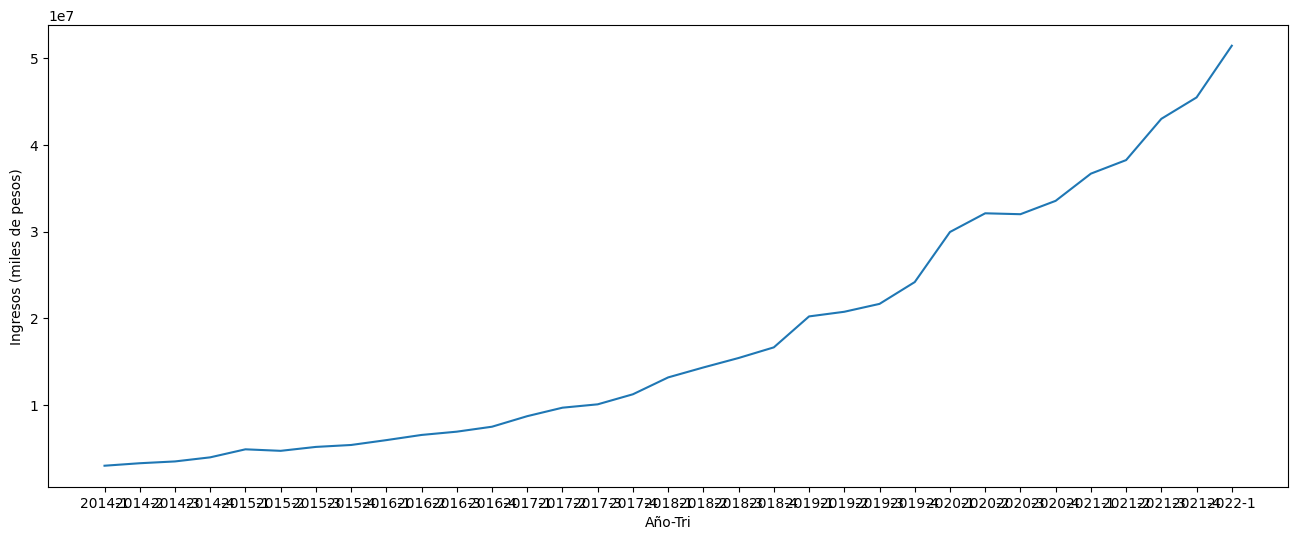

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=a_t, x="Año-Tri", y="Ingresos (miles de pesos)")

In [ ]:
acceso_internet = pd.read_csv("./datasets/AccesosaInternetfijoportecnologiaylocalidad.csv")
acceso_internet

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,914,4.704,- 0,5,- 0,975,- 0,664,7.262,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,- 0,18,- 0,- 0,327,1.127,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,TUCUMAN,Tafí Viejo,El Cadillal,90105070,- 0,- 0,- 0,- 0,- 0,1,- 0,- 0,1,NaN
3123,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,234,234,NaN
3124,TUCUMAN,Trancas,Villa de Trancas,90112030,197,- 0,- 0,- 0,- 0,- 0,- 0,111,308,NaN
3125,TUCUMAN,Yerba Buena,Villa Carmela,90119020,2.062,- 0,- 0,- 0,1,- 0,- 0,97,2.160,NaN


In [ ]:
tecnologia = acceso_internet[["ADSL", "CABLEMODEM", "DIAL UP", "FIBRA OPTICA", "SATELITAL", "WIMAX", "WIRELESS", "OTROS"]]
tecnologia

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS,OTROS
0,914,4.704,- 0,5,975,- 0,664,- 0
1,181,- 0,- 0,- 0,1,- 0,- 0,10
2,- 0,- 0,- 0,- 0,- 0,- 0,181,- 0
3,- 0,782,- 0,- 0,- 0,- 0,327,18
4,- 0,- 0,- 0,- 0,- 0,- 0,6,- 0
...,...,...,...,...,...,...,...,...
3122,- 0,- 0,- 0,- 0,1,- 0,- 0,- 0
3123,- 0,- 0,- 0,- 0,- 0,- 0,234,- 0
3124,197,- 0,- 0,- 0,- 0,- 0,111,- 0
3125,2.062,- 0,- 0,- 0,- 0,- 0,97,1


In [ ]:
tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ADSL          3127 non-null   object
 1   CABLEMODEM    3127 non-null   object
 2   DIAL UP       3127 non-null   object
 3   FIBRA OPTICA  3127 non-null   object
 4   SATELITAL     3127 non-null   object
 5   WIMAX         3127 non-null   object
 6   WIRELESS      3127 non-null   object
 7   OTROS         3127 non-null   object
dtypes: object(8)
memory usage: 195.6+ KB


In [ ]:
for column in ["ADSL", "CABLEMODEM", "DIAL UP", "FIBRA OPTICA", "SATELITAL", "WIMAX", "WIRELESS", "OTROS"]:
    tecnologia[column] = tecnologia[column].str.replace(".", "")

# tecnologia = tecnologia["ADSL"].replace('.', '', regex=True)
tecnologia.replace("- 0", "0", inplace=True)

C:\Users\devek\AppData\Local\Temp\ipykernel_15264\1297995404.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tecnologia[column] = tecnologia[column].str.replace(".", "")
C:\Users\devek\AppData\Local\Temp\ipykernel_15264\1297995404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tecnologia[column] = tecnologia[column].str.replace(".", "")
C:\Users\devek\AppData\Local\Temp\ipykernel_15264\1297995404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
tecnologia

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS,OTROS
0,914,4704,0,5,975,0,664,0
1,181,0,0,0,1,0,0,10
2,0,0,0,0,0,0,181,0
3,0,782,0,0,0,0,327,18
4,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...
3122,0,0,0,0,1,0,0,0
3123,0,0,0,0,0,0,234,0
3124,197,0,0,0,0,0,111,0
3125,2062,0,0,0,0,0,97,1


In [ ]:
tecnologia = tecnologia.apply(pd.to_numeric)

In [ ]:
tecnologia

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS,OTROS
0,914,4704,0,5,975,0,664,0
1,181,0,0,0,1,0,0,10
2,0,0,0,0,0,0,181,0
3,0,782,0,0,0,0,327,18
4,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...
3122,0,0,0,0,1,0,0,0
3123,0,0,0,0,0,0,234,0
3124,197,0,0,0,0,0,111,0
3125,2062,0,0,0,0,0,97,1


In [ ]:
data = tecnologia.sum()
data = data.sort_values(ascending=False)
data

CABLEMODEM      6073426
FIBRA OPTICA    2219533
ADSL            1533240
WIRELESS         545814
OTROS            234058
DIAL UP           12619
SATELITAL          3212
WIMAX              2107
dtype: int64

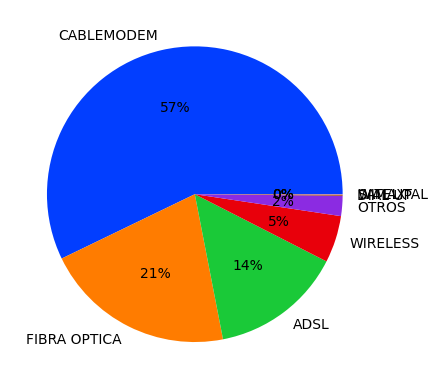

In [ ]:
palette_color = sns.color_palette('bright')
plt.pie( labels=data.index, x=data, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
acceso_internet_velocidad = pd.read_csv("./datasets/AccesosaInternetfijoporvelocidadbajadayprovincia.csv")
acceso_internet_velocidad

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,1.0,Buenos Aires,"26,280",19,- 0,- 0,"31,380",192,"5,958",...,"3,163",- 0,"100,884",- 0,4,212,- 0,2,- 0,- 0
1,2022.0,1.0,Capital Federal,"1,717",31,- 0,- 0,461,35,"1,407",...,3,- 0,"31,684",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,1.0,Catamarca,"2,207",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,1.0,Chaco,"7,580",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,1.0,Chubut,"15,607",8,- 0,- 0,73,32,"1,069",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2017.0,4.0,Santa Fe,"14,119",- 0,- 0,- 0,"3,109",- 0,"7,637",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
429,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
430,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
431,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [ ]:
acceso_internet_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         432 non-null    float64
 1   Trimestre   432 non-null    float64
 2   Provincia   432 non-null    object 
 3   Otros       432 non-null    object 
 4   0,256 Mbps  432 non-null    object 
 5   0,375 Mbps  432 non-null    object 
 6   0,625 Mbps  432 non-null    object 
 7   0,5 Mbps    432 non-null    object 
 8   0,512 Mbps  432 non-null    object 
 9   0,75 Mbps   432 non-null    object 
 10  1 Mbps      432 non-null    object 
 11  1,2 Mbps    432 non-null    object 
 12  1,25 Mbps   432 non-null    object 
 13  1,5 Mbps    432 non-null    object 
 14  2 Mbps      432 non-null    object 
 15  2,2 Mbps    432 non-null    object 
 16  2,5 Mbps    433 non-null    object 
 17  6,7 Mbps    432 non-null    object 
 18  3 Mbps      432 non-null    object 
 19  3,2 Mbps    432 non-null    o

In [ ]:
conectividad_internet = pd.read_csv("./datasets/ConectividadalserviciodeInternet.csv")
conectividad_internet

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,SI,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,SI,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,--,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,JUJUY,El Carmen,Los Lapachos (Est. Maquinista Verón),864,--,--,--,--,--,SI,--,SI,SI,38014050.0,-24.473571,-65.074393
4308,JUJUY,El Carmen,Loteo San Vicente,211,--,--,--,--,--,--,--,--,SI,38014055.0,-24.429325,-65.184397
4309,JUJUY,El Carmen,Manantiales,326,--,--,--,--,SI,--,--,SI,SI,38014060.0,-24.505687,-64.975926
4310,JUJUY,El Carmen,Monterrico,11591,--,SI,--,--,SI,SI,SI,SI,SI,38014070.0,-24.438520,-65.162225


In [ ]:
velocidad_internet = pd.read_csv("./datasets/historico_velocidad_internet.csv")
velocidad_internet.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,"55,11",Ene-Mar 2022
1,2021,4,"52,34",Oct-Dic 2021
2,2021,3,"48,46",Jul-Sept 2021
3,2021,2,"45,63",Abr-Jun 2021
4,2021,1,"43,11",Ene-Mar 2021


In [ ]:
velocidad_internet["Año-Tri"] = velocidad_internet['Año'].astype(str).str.cat(velocidad_internet['Trimestre'].astype(str), sep='-')
velocidad_internet.tail()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Año-Tri
28,2015,1,"4,35",Ene-Mar 2015,2015-1
29,2014,4,"4,16",Oct-Dic 2014,2014-4
30,2014,3,"3,87",Jul-Sept 2014,2014-3
31,2014,2,"3,76",Abr-Jun 2014,2014-2
32,2014,1,"3,62",Ene-Mar 2014,2014-1


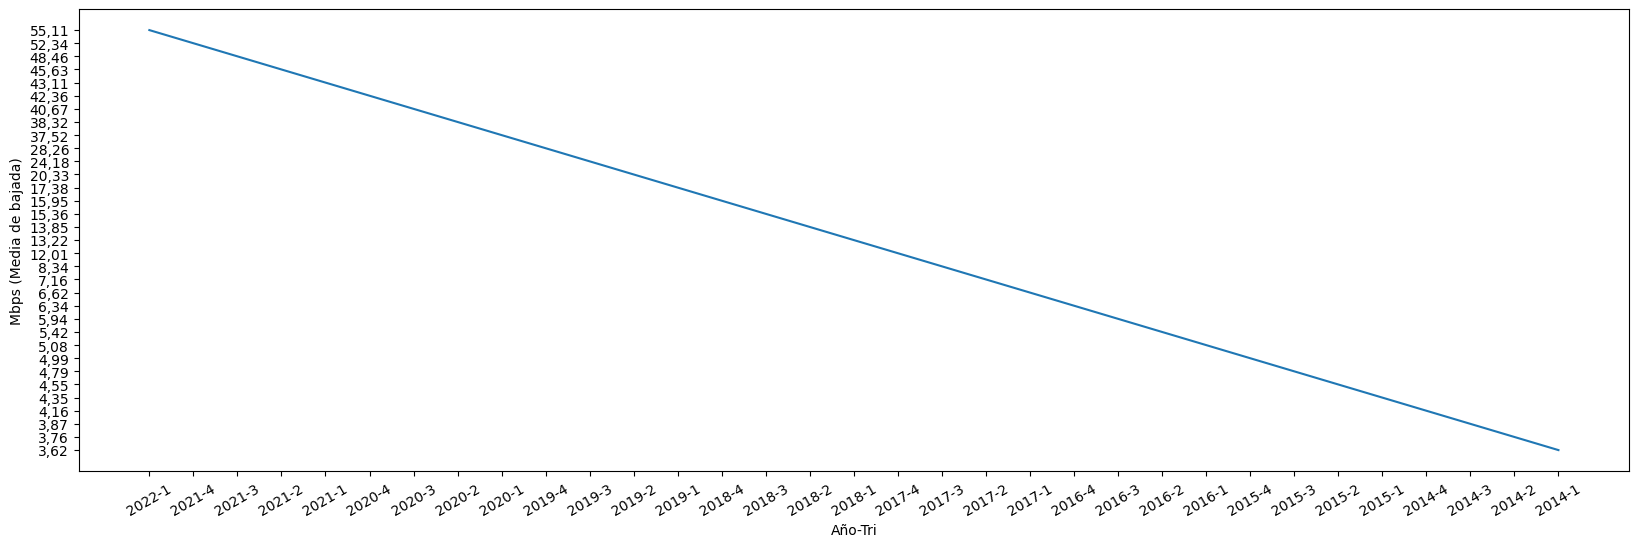

In [ ]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=velocidad_internet, y="Mbps (Media de bajada)", x="Año-Tri")
ax.tick_params(axis='x', rotation=30)

In [ ]:
localidad_conectividad = pd.read_csv("./datasets/Listadodelocalidadesconconectividadainternet.csv")
localidad_conectividad

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,SI,SI,--,SI,SI,SI,SI,SI,SI
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,--,--,--,--,--,--,SI,--,--
2,BUENOS AIRES,25 de Mayo,Del Valle,SI,--,--,--,SI,SI,--,--,SI
3,BUENOS AIRES,25 de Mayo,Ernestina,SI,--,--,--,--,--,--,--,--
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,--,--,--,--,--,--,--,SI,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,JUJUY,El Carmen,Los Lapachos (Est. Maquinista Verón),--,--,--,--,SI,SI,--,SI,--
4308,JUJUY,El Carmen,Loteo San Vicente,--,--,--,--,SI,--,--,--,--
4309,JUJUY,El Carmen,Manantiales,--,--,--,--,SI,SI,--,--,SI
4310,JUJUY,El Carmen,Monterrico,--,SI,--,--,SI,SI,SI,SI,SI
